In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
df=pd.read_csv("titanic_toy.csv")

In [64]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [66]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [67]:
X=df.drop(columns=["Survived"])
y=df["Survived"]

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [70]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [71]:
mean_age=X_train["Age"].mean()
median_age=X_train["Age"].median()

In [74]:
X_train["Age_mean"]=X_train["Age"].fillna(mean_age)
X_train["Age_median"]=X_train["Age"].fillna(median_age)

In [76]:
X_train.sample(4)

,Age,Fare,Family,Age_mean,Age_median
310,24.0,83.1583,0,24.000000,24.00
300,NaN,7.7500,0,29.785904,28.75
604,35.0,26.5500,0,35.000000,35.00
348,3.0,15.9000,2,3.000000,3.00


In [77]:
mean_fare=X_train["Fare"].mean()
median_fare=X_train["Fare"].median()

In [78]:
X_train["Fare_mean"]=X_train["Fare"].fillna(mean_fare)
X_train["Fare_median"]=X_train["Fare"].fillna(median_fare)

In [79]:
X_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [80]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
206,32.0,15.8500,1,32.000000,32.00,15.8500,15.8500
500,17.0,8.6625,0,17.000000,17.00,8.6625,8.6625
463,48.0,13.0000,0,48.000000,48.00,13.0000,13.0000
369,24.0,69.3000,0,24.000000,24.00,69.3000,69.3000
669,NaN,52.0000,1,29.785904,28.75,52.0000,52.0000


In [82]:
X_train.describe()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
count,564.000000,676.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.785904,32.617597,0.932584,29.785904,29.570576,32.617597,31.699430
std,14.295087,49.479268,1.653860,12.720559,12.727512,48.210357,48.374487
min,0.420000,0.000000,0.000000,0.420000,0.420000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,23.000000,23.000000,7.925000,7.925000
50%,28.750000,14.458300,0.000000,29.785904,28.750000,15.500000,14.458300
75%,38.250000,31.275000,1.000000,35.000000,35.000000,32.617597,30.500000
max,71.000000,512.329200,10.000000,71.000000,71.000000,512.329200,512.329200


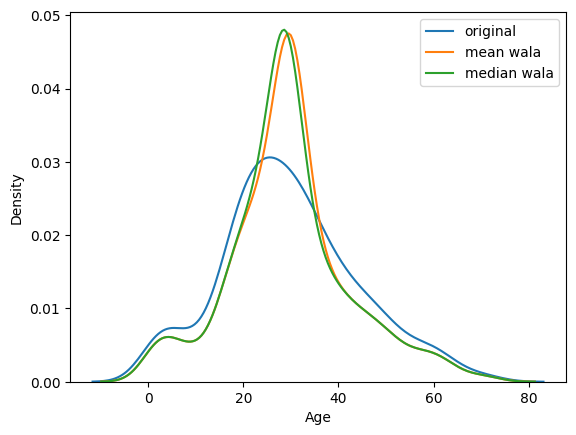

In [89]:
import seaborn as sns
sns.kdeplot(X_train,x="Age",label="original")
sns.kdeplot(X_train,x="Age_mean",label="mean wala")
sns.kdeplot(X_train,x="Age_median",label="median wala")
plt.legend()

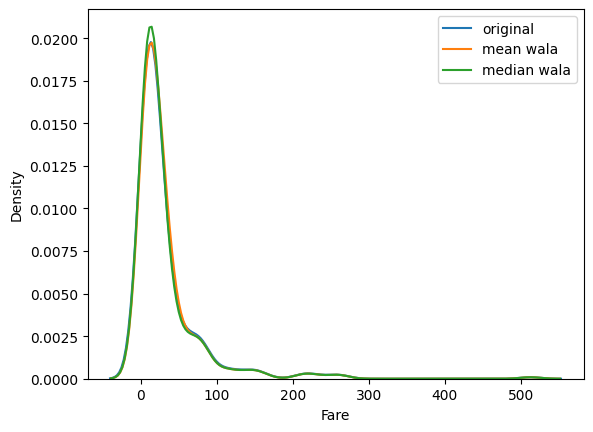

In [90]:
import seaborn as sns
sns.kdeplot(X_train,x="Fare",label="original")
sns.kdeplot(X_train,x="Fare_mean",label="mean wala")
sns.kdeplot(X_train,x="Fare_median",label="median wala")
plt.legend()

<Axes: >

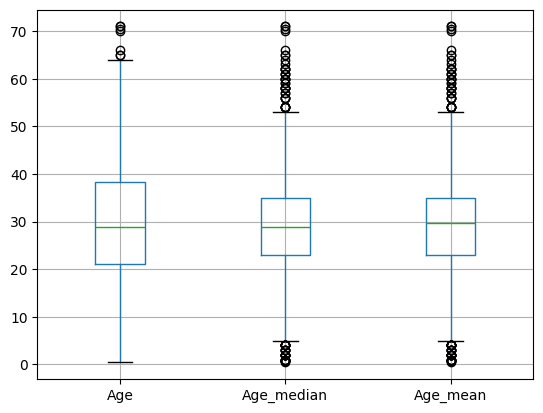

In [91]:
X_train[["Age","Age_median","Age_mean"]].boxplot()

<Axes: >

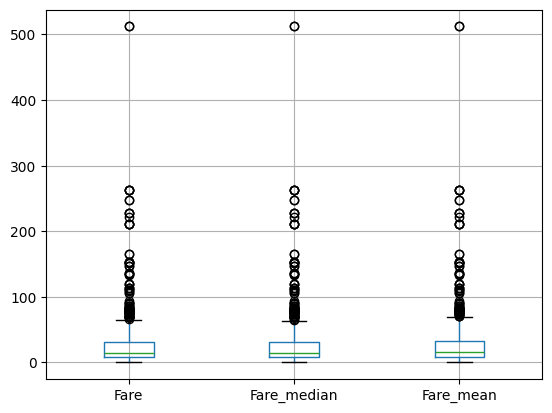

In [92]:
X_train[["Fare","Fare_median","Fare_mean"]].boxplot()

## Sklearn

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
imputer1=SimpleImputer(strategy="median")
imputer2=SimpleImputer(strategy="mean")

In [95]:
trf=ColumnTransformer([
    ("imputer1",imputer1,["Age"]),
    ("imputer2",imputer2,["Fare"])
],remainder="passthrough")

In [96]:
trf.fit(X_train)

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [97]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [99]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])